In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Logistic Regression and Gradient Descent

Linear regression allows us to make numerical predictions based on one or more inputs, either numerical or categorical. Logistic regression is the equivalent that allows us to make classification predictions - predicting if something falls into group A or group B. Logistic regression (and other classification methods) are extremely common. Regression/prediction and classification are the two big pillars of predictive analytics that we will look at through next term. 

One thing that we can think of to get started is how to visualize a one feature logistic regression. In a linear regression the line, or model, was a prediction of value - with an input of X, we predict a value of Y. When plotting a logistic regression, the line, or model, is a dividing line between two classes. With an input of X, we predict a class of A or B.

![Logistic Regression](images/log_reg.png "Logistic Regression")

## The Classification Problem

Dealing with classification is a little different than regression, because now we are not looking to predict a value, we are looking to predic a class - or phrased alternatively, we are looking to divide two (or more) sets of data.  

If we plot a simple 2 varaible problem, just like we did in linear regression, we'll get something that looks like this:
<ul>
<li> Suppose that BMI is our X and Outcome (do you have diabetes?) is the Y. 
<li> Plot that on a scatter plot. 
<li> Our goal is to use X to predict Y, just as it was in linear regression. 
<li> However, there's not a very obvious way to use the X value only to do a linear regression that has any degree of accuracy.
    <ul>
    <li> Seriously, try to generate any line of best fit that doesn't have massive residuals. 
    </ul>
</ul>

In [5]:
df = pd.read_csv("data/diabetes.csv")
df = df[["BMI","Outcome"]]
df.head()

,BMI,Outcome
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1


In [3]:
#Load some data. We'll use this in a bit. 
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
sns.scatterplot(data=df, x="BMI", y="Outcome")

ValueError: Could not interpret value `BMI` for parameter `x`

#### So What Do We Do?

We need something that can transform our simple linear fitting into something... else. 

## Logistic Regression

Logistic regression is a way to transform our linear regression into something that can be used for classification. Simply put, when we perform a linear regression to predict a value, we have something that we can calculate directly using the least squares algorithm with a one-X calculation, or the equivalent matrix multiplication when we have multiple features. In other words, we can use the incoming data that we have, both the X and the Y, to calculate the coefficients that we need to predict Y.

![Least Squares Equation](images/least_squares_equation.jpg "Least Squares Equation")

However, when we are doing classification, we don't have a Y value that we can use to calculate the coefficients. We have a Y value that we want to predict, but we don't have a Y value that we can use to calculate the coefficients. There's no linear regression possible that will spit out yes or no, or 1 or 0. 

We can, however, use a few twists on the linear regression to get there, first we can change the linear regression equation from producing the actual value into an equation that produces the log odds, or the logit, of the value. So, the "logistic" part of the logistic regression is due to the logit (or the log-ness), and the "linear" part of the logistic regression is due to the fact that we are still using a linear equation to calculate the logit. This part is, from our perspective, arbitrary - someone figured out that this works, and it does, so we use it. So, when doing a logistic regression, we are doing a linear regression of the logit - or the log odds - of the value that we are trying to predict.

<big>

$ logit = log(odds) = log(\frac{p}{(1-p)}) = log(\frac{p}{not p}) = log(\frac{prob(1)}{prob(0)}) = m*x + b$ 

</big>

Where p is the probability of the event happening, and 1-p is the probability of the event not happening. We represent one of the two outcomes as p, or 1, and the other possible outcome as 1-p, or 0. Which one is which is arbitrary, but we need to be consistent. It is possible to do logistic regression with more than two outcomes, but that comes later, for now we are just doing two outcomes - a binary classification.

At this point still have no way to use a regression to predict yes or no, but we do have a way to use a regression to predict the log odds of yes or no. The second step in making things work is to translate the log odds into probability. The two images below show a full derivation for a one-X scenario, if we have more than one input, we'd just have more than one X and more than one coefficient, or w in the example below:

![Logistic 1](images/logit_math_1.jpeg "Logistic 1")
![Logistic 2](images/logit_math_2.jpeg "Logistic 2")

We don't need to delve super deep into this derivation, be able to do it, or understand all of the details to understand logistic regression well enough to do machine learning, but we do need to understand the basic idea.

## Enter the Sigmoid

Our logistic regression really picks up at one of the steps above, where a note takes care to point out that we have the sigmoid - a formula of the form:

<big><big>

$ p = \frac{1}{1+e^{-z}} $

</big></big>

Also note that the z is the logit, or the outcome of the linear regression that we mentioned up above. The line below expresses it slightly differently, by representing the sigmoid as we would with a python function, that takes in a value for z (the logit) and returns a value for p (the probability). We can also say something like we take the outcome of our model, and pass it through the sigmoid function to get the probability of the outcome being 1. The sigmoid function has the fun property of being bounded between 0 and 1, which is exactly what we need for a probability. It has another fun property of being quite steep in the middle, meaning that it is "decisive" in splitting data to one side or another. 

![Sigmoid](images/sigmoid.png "Sigmoid")

### Logistic Regression

This is where we have a really ML-relevant step - we can produce a prediction of the probability of 1/0 through a regression. That step of taking the regression output and passing it through the sigmoid function is the key to logistic regression. We can use the linear regression to calculate the logit, and then we can use the sigmoid function to turn the logit into a probability. We can then use the probability to make a classification prediction by relying on the shape of the sigmoid, and dividing the data at 0.5. As a note, this is also how a neural network works at its core. 

This means that after all those steps, for any given input, we can put the value in for X (or several Xs), calculate the logit, pass it through the sigmoid, perform a cutoff at 0.5, and make a prediction of either 1 or 0. Our full, end-to-end logistic regression looks like this:

<big><big>

$ p = \frac{1}{1+e^{-(m*x+b)}} $

</big></big>

Where p is the probability of the outcome being 1, and m and b are the coefficients that we calculate using the least squares algorithm.

## What About the Coefficients?

One key thing that we've been missing all along is how to calculate the coefficients, a seemingly important step. In a logistic regression we don't have a way to directly calculate the slope(s) and intercept like we do with a linear regression. We can't use the least squares algorithm to calculate the coefficients, because we don't have a Y value to use - we only have probabilities. The probabilistic nature of the calculation we just looked at stops us from having certainty in our coefficients.

To figure out the coefficients in a logistic regression we need a totally different approach, one of the most important concepts in machine learning - gradient descent.

## Gradient Descent

Gradient descent is a method of finding the minimum of a function - in our case it is a method of finding the minimum of the cost function. 

### The Cost Function

Before we can proceed with gradient descent we must introduce the cost function - a function that we define that tells us how wrong our model is. This function is important because the idea of gradient descent is to minimize the cost function by running several iterations; at each stage the cost function tells the algorithm how wrong the model is, so it can adjust be more accurate. 

The cost function is a function of the actual values and the predicted values. In a regression, the cost function is the mean squared error, or the average of the squared residuals. We can measure how wrong our model is by calculating the cost function, if it gets lower the model is better, if it gets higher the model is worse. In a logistic regression, the idea of the "cost" is slightly different because we are predicting a yes/no, so the idea of "slightly better" doesn't apply in the same way as it does with MSE. In a classification we only have correct or incorrect, so if we have a value in the training data where the model is 50.1% sure that it is a 1, and the actual value is a 0, that's just as wrong as if the model was 99.9% sure that it was a 1.

In a classification problem we need to look at the cost differently, not as a function of the final prediction, but as a function of the probabilities. The output of the sigmoid function is a probability, so we can use that probability to calculate the cost. In this case, if we have a value that is a 1, and the model predicts a 0.9, the cost, or loss is low as we only "missed" by .1. If we have a value that is a 1, and the model predicts a 0.1, the cost, or loss is high as we "missed" by .9. This allows the model to learn more accurately how good it is, and when we continue with the gradient descent, that is critical. There are several possible cost functions, but the most common is the log loss function, or binary cross entropy:

<big><big>

$ logloss = 1/n \sum_{i=1}^{n} -y_i*log(\hat{y_i}) - (1-y_i)*log(1-\hat{y_i}) $

</big></big>

So, every time we calculate the cost of our model, we are calculating the log loss, which will not tell us how many we get right or wrong, but will tell us how wrong we are in aggregate - just like the MSE in a regression.

### Gradient Descent

Back to gradient descent. The basic idea of gradient descent is:

<ul>
<li> Start with a random guess for the coefficients. </li>
<li> Calculate the cost function. </li>
<li> Adjust the coefficients to make the cost function lower. </li>
<li> Repeat until the cost function is as low as possible. </li>
</ul>

Or basically an elaborate, math nerd version of "guess and test". The core idea of gradient descent is that simple - it is an algorithm that adjusts coefficients, measures cost, and repeats until the cost is as low as possible. 

The one step that is a little more complicated is the "adjust the coefficients to make the cost function lower" step. It isn't clear how the algorithm knows to make the coefficients lower or higher, and by how much. The answer to this lies in calculus, and the idea of a derivative. The derivative of a function is the slope of the function at a given point. So, if we calculate the derivative of the loss function with the coefficients at a certain point, that will tell us the slope of the loss function at that point. If the slope is positive, we need to move the coefficients down, if the slope is negative, we need to move the coefficients up. The size of the slope tells us how much to move the coefficients. This leads to the most common visualization of gradient descent, the "hill climbing" visualization:

![Gradient Descent](images/gradient_descent.png "Gradient Descent")

So in each round of the process, the algorithm will:

<ul>
<li> Calculate the cost function. </li>
<li> Calculate the derivative of the cost function.</li> 
    <ul>
    <li> Specifically, the partial derivative of the cost function with respect to each coefficient. </li>
    <li> This means that each separate derivative will tell us how much to adjust each coefficient individually, they each have their own "slope". </li>
    </ul>
<li> Adjust the coefficients by the derivative times the learning rate. </li>
    <ul>
    <li> The learning rate is a hyperparameter that we set, it is the size of the step that we take in each iteration. </li>
    <li> If the learning rate is too small, the algorithm will take a long time to converge, or find an answer. </li>
    <li> If the learning rate is too large, the algorithm will overshoot the answer and never converge. </li>
    <li> We will look more at learning rates in the future. </li>
    </ul>
<li> Repeat until the cost function is as low as possible. </li>
    <ul>
    <li> The cost is low when the derivitive is zero, or when the slope is zero. This means that the algorithm is at the bottom of the cost. </li>
    <li> The algorithm will never actually reach zero, but it will get close enough to be good enough. </li>
    <li> We often also set a cutoff, such as maximum number of iterations, to prevent the algorithm from running forever. </li>
    </ul>
</ul>

Critically here, as the gradient descent process is working, we don't look at correct or incorrect predictions at all, we only look that the cost - or the measure of how close our prediction was to the correct answer. Our model making correct predictions will be highly correlated with the cost, but it is not a factor in the gradient descent process. We only evaluate the actual accuracy in predictions after the model is created. 

#### Extra Details

The gradient descent algorithm is a little more complicated than that, but not much. The algorithm is:

<big><big>

$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) $

</big></big>

Where $\theta_j$ is the coefficient that we are adjusting, $\alpha$ is the learning rate, and $J(\theta_0, \theta_1)$ is the cost function. The learning rate is a hyperparameter that we set, and the cost function is the function that we are trying to minimize. The algorithm is a little more complicated than that, but not much. The algorithm is:


## Walkthrough Example

We'll walk through the first part of a logistic regression here, through the first round of gradient descent. Simple example... We want to predict Y, given some values of X. For this, we can say that the values are as follows:

<ul>
<li> Y = Passed high school. 1 = Yes.
<li> X1 = Attended class. 1 = Yes.
<li> X2 = Studied at home. 1 = Yes. 
</ul>

Each set of values (a column) is one person, so we have two people who passed and two who did not. The details of the data don't matter much, we're looking at the mechanics here. We'll do a real one in a min. This middle part of the curve is sometimes called the Decision Boundary. 

In [ ]:
#Data
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

We can do a regression, using the logit formula:

$\log o = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

We don't know our coefficients though - the process for determining them isn't a direct calculation like linear regression. Here we need to try some, check our error, then improve. (This is a common thing in ML).

For this, we are making an arbitrary guess. 

In [ ]:
b = [-1.5, 2.8, 1.1]

Now, we can calculate it out, just like a linear regression. 

In [ ]:
log_o = b[0] + b[1] * x1 + b[2] * x2
log_o

array([-1.5, -0.4, -0.4,  2.4])

Now, convert log odds to odds

In [ ]:
o = np.exp(log_o)
o

array([ 0.22313016,  0.67032005,  0.67032005, 11.02317638])

Now, convert odds to probabilities. These probabilities are the outputs of the sigmoid calculation, and we can use them to classify by just labeling things that are over the cutoff (usually .5) as 1s and the things that are under as 0. 

In [ ]:
p = o / (o+1)
p

array([0.18242552, 0.40131234, 0.40131234, 0.9168273 ])

#### In Real Usage

Those are all the predicted probabilities of each person passing high school. 

Now, a little weirdness. We started out this whole thing with some pretty random values for all the coefficients, so why would we trust these predictions? Well, right now, we wouldn't. What we need to do to make a model that is actually accurate is to check how well we did now, then make some improvements. 

To check how well we did now, we can calculate how close the probabilites are to the real values. E.g. Person #4 did really graduate, and our model predicted a ~92% chance of them graduating, that's good. Person #2 also graduated, but our model only predicted a ~40% chance of them graduating, that's bad. So our metric for evaluating is that we want our predictions to be as close as possible to the real values - or we want "1"s to have high percentages, and "0"s to have low percentages. The more sharpely we can discriminate between passes and fails, the more accurate the model. 

We can calculate this overall accuracy pretty simply - how likely are we to predict the correct answer? 

### Cost and Loss

Some new concpets that are introduced here, and are important going forward, are the ideas of cost and loss. When doing these types of iteritive training processes our progress is tracked by our loss, or the amount of error. This amount is calculated by our loss function, or how that error is calculated. This is directly comparable to the MSE/RMSE process we looked at previously, we have some calculation to determine our overall accuracy. 

Each time we do an iteration, we get some amount of error, or loss. The best solution is where this loss is at it's lowest. This is the same idea as how the best linear regression model is best when the loss - the linear least squares distance - is at it's lowest. 

<b>Note:</b> the terms cost and loss are often used interchangably, and this is generally fine. Technically the loss function is for each specific example, and the cost is the overall summary. In practice, it is not that big of a deal to swap the terms - there won't really be many, if any, scenarios in which that will be confusing. 

### Gradient Descent

Gradient descent is the way that many algorithms try to minimize their loss. In short, this process is just:
<ul>
<li> Create a model. 
<li> Measure the loss. 
<li> Adjust the model's values (i.e. the slopes and intercepts here)
<li> Check the loss again. 
<li> Repeat until you reach the lowest value for loss. (i.e. the most accurate model)
</ul>

![Gradient](images/grad_desc.png "Gradient")

The algorithm "knows which way to go" in adjusting the weights between each trial via some calculus and matrix math that we will peek into when we look at neural networks. The algorithm can basically use partial derivitives to attribute error to the different values (the slopes), as well as if they are too high or too low. Each step moves these values a little, then we recheck. 

We will explore the details of gradient descent much more as we get into the machine learning stuff, for now understanding the general idea is good enough. This process is how most machine learning models "learn", and this is what is going on when they are processing for a long time. Each iteration moves the results (hopefully) to a point where the model has a little less error, and eventually we either "find the bottom" - which in logistic regression is the slopes and intercept values for the log-odds regression above, or we hit a limit of iterations. 

##### What is our Loss?

Our loss in the example above is a calculation the summarizes all of our individual errors. In the previous cell we calculated the probability of each person passing (being 1), our original Y data shows us the true probability of each person passing (either 0 or 1). Each prediction has an error of the distance between that true value and our expected probability. 

E.g. for the second item, this person passed, so the real value is 1. We predicted a ~40% likelihood of them passing, so our error there is ~60%. Person 4 passed, we predicted a ~92% chance of them passing, so our error is ~8%. 

In [ ]:
#likes = np.where(y, p, 1-p)
likes = np.where(y, 1-p, p)
likes

array([0.18242552, 0.59868766, 0.40131234, 0.0831727 ])

##### Loss Function

These individual accuracies can be tallied up, we'll do a simple one with a common loss function called log-loss. There are a bunch of "real" loss functions that we can use, we'll explore them later on in machine learning. The most simple one is also based on the log of the odds, it is called Binary Cross-entropy, or Log-Loss. Don't worry about these details too much now, we will explore this later. 

![Log Loss](images/log_loss.png "Log Loss")

The goal of the algorithm is to find the smallest value for this totalled loss, that's when we are most accurate overall. 

We can turn this loss total into an overall cost by just dividing by n. 

In [ ]:
loss_sum = 0
for i in range(len(p)):
    if y[i] == 1:
        loss_sum += -np.log(p[i])
    elif y[i] == 0:
        loss_sum += -np.log(1-p[i])
cost = loss_sum/len(p)
cost

0.42856998373415184

Our overall goal is to find the lowest possibility for this value. The lower this value, the closer to reality our model was predicting, the more accurate we can be. The process is to now to:
<ul>
<li> Take this amount of overall error, use it to make an adjustment to those starting values. (The ones we made up to start)
    <ul>
    <li> This step is something we'll look at in more depth with neural networks. In involves some partial derivitives which (kind of) allow us to work backwards and attribue parts of the errors to the original inputs. 
    </ul>
<li> Calculate the new error with the different starting point. 
<li> Repeat - each stage should move us a little closer to the "true" answer. 
    <ul>
    <li> In other words, we are repeating the process over and over until we've found the solution that minimizes our overal cost/loss (the amount of error). 
    </ul>
</ul>

This process is called Gradient Descent and is something we will care about more in ML class. Basically we define something called a loss function, which measures how much error we have. We then repeat a bunch of trials with different coef values, and measure the loss each time. We keep repeating until we've found the lowest amount of loss - or the smallest amount of error. The math can be complex, but the idea is pretty simple. If we manually changed the array of b values, ran the model, collected the LIKE value, and finally selected the combination with the best LIKE, that'd be a crude version of the same thing. This idea is common later on. Here, sklearn or statsmodels do it for us.



### Full Gradient Descent Process in Practice

![Logistic](images/logistic.webp "Logistic")

As we use logistic regression, the fit() step that trains our model is the first look at a model that has a substantial training step - the numerous rounds of gradient descent to find the best coefficients. The process looks like this with the heart disease dataset:
<ul>
<li> Create the linear regression, starting with random coefficients for slopes and intercept. </li>
<li> Calculate the result of the linear regression, the log odds, for each row. </li>
<li> Pass the log odds through the sigmoid function to get the probability of each row. </li>
<li> Calculate the loss, or the error, of the model. Normally by measuring the "true" value of 1 or 0, with the predicted probability of a 1 that came out of the sigmoid. </li>
<li> Calculate the derivative of the loss function with respect to each coefficient. </li>
<li> Adjust the coefficients by the derivative times the learning rate. </li>
<li> Go back up to calculating the result of the linear regression, and repeat until the loss is as low as possible or we hit a limit. </li>
<li> The coefficients at the stopping point are the coefficients that complete our model. </li>
</ul>

This process is totally different in concept to the linear regressions that we've looked at that can be calculated directly through least squares. This process is iterative, and requires a lot of computation, which is a main reason why we need lots of processing power for machine learning. In real applications, most algorithms, even linear regression (more details later), use some form of gradient descent to find the best coefficients. This approach is very useful and versatile as we can always work towards a solution incrementally, almost no matter where we start. As long as we can define some measure of cost, or some measure that tells the model how well it is doing, we can use gradient descent to push the model to be better. 

Gradient descent is also the core of neural networks, in fact a neural network is roughly like a series of many large logistic regressions, each one feeding into the next. The process of training a neural network is very similar to this, the main difference being that neural networks generally have far more weights that can be adjusted, giving them the ability to learn very complex patterns in data, provided we have enough data and enough processing power for it to be trained. 

### The Sigmoid and the Regression

The sigmoid function is a function that takes in inputs (X values) and squishes all the outputs (Y values) between 0 and 1. The sigmoid is also the inverse of the logit function. The function is:

$ g(x) = \frac{1}{(1+e^-x)} = logit^-1 $

A graph of what it ends up looking like is below. (Ignore the red line for now). The important part is now we have a way to connect the probabilities to our sigmoid function. 

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

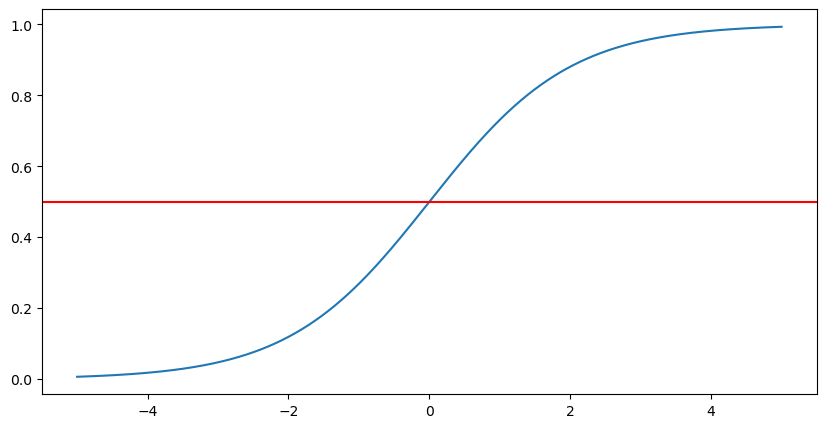

In [ ]:
# Creating vectors X and Y
x = np.linspace(-5, 5, 10000)
y = sigmoid(x)
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
# Show the plot
plt.axhline(.5, color="red")
plt.show()

Our logistic regression is going to use this sigmoid functions to generate a prediction between 0 and 1. Can can plug the linear regression equation into the sigmoid function, then our new hypothesis becomes:

$ y = \frac{1}{(1+e^(m*x+b))} $

Where y = probability. 

Note - the mathmatical derivations aren't really super-duper critical. If it is confusing, just ingore it. There's a full derivation and example here: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

<h2>Real Example - SciKitLearn</h2>

For our first try we can use the diabetes example we've used a bit before, though we've always sidesteped the true target. The outcome value is whether or not someone is diabetic, and all the other variables that are risk factors that we can use to predict if someone will become diabetic. Our aim is to predict, yes or no, will someone develop diabetes based on those risk factors. 

First - one variable. We'll use BMI.

In [ ]:
y = np.array(df["Outcome"]).reshape(-1,1)
x = np.array(df["BMI"]).reshape(-1,1)
print(x.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

(768, 1) (768, 1)


<b>ravel()</b> - sometimes you may get a message that says something like "we want the y data in the shape (samples,)". This is obviously a contradiction to what we said to always shape the y as (samples, 1). The easiest way to deal with this is to use the .ravel() function as shown below. The cause is the expectation of data format for whatever you're using, which can vary. If we always make the y array (samples, 1) and then use ravel when needed, that allows us to be consistent and not worry about it much. I'd suggest keeping with this for simplicity. 

In [ ]:
md1 = LogisticRegression().fit(X_train,y_train.ravel())
md1Pred = md1.predict(X_test)

score = md1.score(X_test, y_test)
print(score)

0.6496062992125984


66% accuracy. Not bad. We can try with more Xs though...

#### Multiple Logistic Regression

In [ ]:
#Get all the X values. 
# I can use the y from above still 
df2 = df.drop(columns={"Outcome"})
x2 = np.array(df2)
x2.shape

(768, 8)

In [ ]:
#I'm reusing some varaible names to make my life easier with copy/paste. 
#Make sure you run things in order if you do this. 
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.33)

md2 = LogisticRegression().fit(X_train,y_train.ravel())
md2Pred = md2.predict(X_test)
score = md2.score(X_test, y_test)
print(score)

0.7677165354330708


/Users/akeem/anaconda3/envs/ml_2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


When I ran this the first time, I didn't get an answer, I instead got something along the lines of "failed to converge". This means that the gradient descent process didn't finish, and the algorithm didn't settle on an answer. We will explore this more in the machine learning stuff, for now we can just tell it to set a higher cap on how long it can run. 

In [ ]:
md2 = LogisticRegression(max_iter=1000).fit(X_train,y_train.ravel())
md2Pred = md2.predict(X_test)
score = md2.score(X_test, y_test)
print(score)

0.7677165354330708


### Classification Results 

We can demonstrate some results... We'll look into result details more later. 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
preds = md2.predict(X_test)

In [ ]:
print(classification_report(y_test, preds, digits=2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       165
           1       0.70      0.58      0.64        89

    accuracy                           0.77       254
   macro avg       0.75      0.73      0.73       254
weighted avg       0.76      0.77      0.76       254



In [ ]:
print(confusion_matrix(y_test, preds))

[[143  22]
 [ 37  52]]


<Axes: >

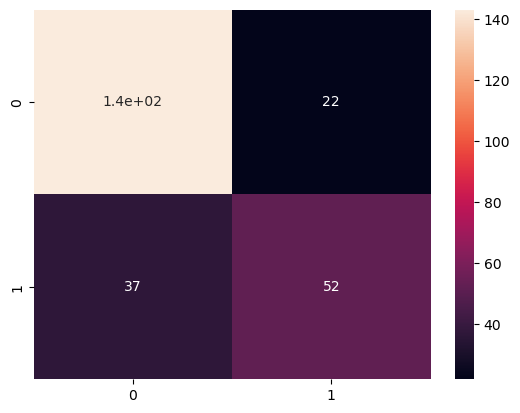

In [ ]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

In [ ]:
print(accuracy_score(y_test, preds)*100)

76.77165354330708


<h1>Work Through Titanic</h1>

Predict who lives...

In [ ]:
#Data
dfe = pd.read_csv("data/train.csv")
dfe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dfe["no_cabin"] = dfe["Cabin"].isnull()
dfe["family"] = dfe["SibSp"] + dfe["Parch"]

I dropped age due to missing values. Think about if there's anything else we may want to do to it instead. 

In [ ]:
dfe2 = dfe.drop(columns={"Name", "Ticket", "Cabin", "SibSp", "Parch", "PassengerId", "Age"})
dfe2.head()

,Survived,Pclass,Sex,Fare,Embarked,no_cabin,family
0,0,3,male,7.2500,S,True,1
1,1,1,female,71.2833,C,False,1
2,1,3,female,7.9250,S,True,0
3,1,1,female,53.1000,S,False,1
4,0,3,male,8.0500,S,True,0


In [ ]:
#Redo the dummy variables. 
dfe2_dumb = pd.get_dummies(dfe2, drop_first=True)

ye = np.array(dfe2_dumb["Survived"]).reshape(-1,1)
xe = dfe2_dumb.drop(columns={"Survived"})
xe.shape, ye.shape

((891, 7), (891, 1))

In [ ]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(xe, ye)

titan = LogisticRegression(max_iter=1000).fit(X_trainT,y_trainT.ravel())
titan_preds = titan.predict(X_testT)
scoreT = titan.score(X_testT, y_testT)
scoreT

0.8161434977578476